In [1]:
# Import the required modules
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring Data

In [2]:
# Read in the DataFrame
jobs_df = pd.read_csv("fake_job_postings.csv")

# Review the DataFrame
display(jobs_df.head())
display(jobs_df.tail())

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
17879,17880,Web Application Developers,"NZ, N, Wellington",Engineering,NaN,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Engineering,0


In [3]:
# Null count in each column 
jobs_df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [4]:
# Top 5 words used when not fraudulent 
print(jobs_df[jobs_df.fraudulent == 0].title.value_counts()[:5])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
Name: title, dtype: int64


In [5]:
# Top 5 words used when fraudulent 
print(jobs_df[jobs_df.fraudulent == 1].title.value_counts()[:5])

Data Entry Admin/Clerical Positions - Work From Home               21
Home Based Payroll Typist/Data Entry Clerks Positions Available    21
Cruise Staff Wanted *URGENT*                                       21
Customer Service Representative                                    17
Administrative Assistant                                           16
Name: title, dtype: int64


In [6]:
#Most frequent jobs
print(jobs_df.title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        75
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [7]:
# Count of fraudulent vs not fraudulent 
jobs_df.groupby('fraudulent')['fraudulent'].count()

fraudulent
0    17014
1      866
Name: fraudulent, dtype: int64

## Cleaning Data

In [8]:
# Add blanks to NA 
jobs_df.fillna('',inplace=True)

In [9]:
# Add country column to dataset 
def split (location):
    l = location.split(',')
    return l[0]
jobs_df['country'] = jobs_df.location.apply(split)

In [10]:
# Salary_Range most Nulls change column as mentioned or not 
jobs_df['salary_mentioned'] = jobs_df['salary_range']

jobs_df['salary_mentioned'][jobs_df['salary_mentioned'].notna()] = 1
jobs_df['salary_mentioned'].fillna(0, inplace=True)

# Drop salary_range column since we don't need it now
jobs_df.drop(columns='salary_range', inplace=True)

C:\Users\alahn\AppData\Local\Temp\ipykernel_1784\2633637106.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs_df['salary_mentioned'][jobs_df['salary_mentioned'].notna()] = 1


In [11]:
# Merge columns with strings together 
jobs_df['company_profile'] = jobs_df['company_profile'].fillna(' ')
jobs_df['description'] = jobs_df['description'].fillna(' ')
jobs_df['requirements'] = jobs_df['requirements'].fillna(' ')
jobs_df['benefits'] = jobs_df['benefits'].fillna(' ')

# Merge to Description
jobs_df['description'] = jobs_df['company_profile'] + ' ' + jobs_df['description'] + ' ' + jobs_df['requirements'] + ' ' + jobs_df['benefits']

# Drop columns since we don't need it now 
jobs_df.drop(['company_profile', 'requirements', 'benefits'], axis=1, inplace=True)

# Strings to lowercase
jobs_df['description'] = [x.lower() for x in jobs_df['description']]

In [12]:
# Fill in Department using Function when requires since so similar
jobs_df['department'].fillna(jobs_df.function, inplace=True)

# Drop column since we don't need it 
jobs_df.drop(columns='function', inplace=True)

In [13]:
# Preview 
jobs_df.head()

,job_id,title,location,department,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,fraudulent,country,salary_mentioned
0,1,Marketing Intern,"US, NY, New York",Marketing,"we're food52, and we've created a groundbreaki...",0,1,0,Other,Internship,,,0,US,1
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 seconds, the worlds cloud video production ...",0,1,0,Full-time,Not Applicable,,Marketing and Advertising,0,NZ,1
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,valor services provides workforce solutions th...,0,1,0,,,,,0,US,1
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,our passion for improving quality of life thro...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,0,US,1
4,5,Bill Review Manager,"US, FL, Fort Worth",,spotsource solutions llc is a global human cap...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,0,US,1


In [14]:
# Convert all string columns to numeric values using categorical codes
jobs_df['country']= jobs_df.country.astype('category').cat.codes
jobs_df['location']= jobs_df.location.astype('category').cat.codes
jobs_df['department']= jobs_df.department.astype('category').cat.codes
jobs_df['employment_type']= jobs_df.employment_type.astype('category').cat.codes
jobs_df['required_experience']= jobs_df.required_experience.astype('category').cat.codes
jobs_df['required_education']= jobs_df.required_education.astype('category').cat.codes
jobs_df['industry']= jobs_df.industry.astype('category').cat.codes


In [15]:
# Preview to check if turned to numerics
jobs_df.head()

,job_id,title,location,department,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,fraudulent,country,salary_mentioned
0,1,Marketing Intern,2536,759,"we're food52, and we've created a groundbreaki...",0,1,0,3,5,0,0,0,86,1
1,2,Customer Service - Cloud Video Production,1074,1162,"90 seconds, the worlds cloud video production ...",0,1,0,2,7,0,76,0,61,1
2,3,Commissioning Machinery Assistant (CMA),1868,0,valor services provides workforce solutions th...,0,1,0,0,0,0,0,0,86,1
3,4,Account Executive - Washington DC,1704,1055,our passion for improving quality of life thro...,0,1,0,2,6,2,23,0,86,1
4,5,Bill Review Manager,1742,0,spotsource solutions llc is a global human cap...,0,1,1,2,6,2,52,0,86,1


In [16]:
# Convert Description strings to lowercase and remove all punctutations to improve tokenization
import string
jobs_df['title'] = [x.lower() for x in jobs_df['title']]
jobs_df['title'] = jobs_df['title'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))
jobs_df['description'] = jobs_df['description'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

In [17]:
jobs_df.head()

,job_id,title,location,department,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,fraudulent,country,salary_mentioned
0,1,marketing intern,2536,759,were food52 and weve created a groundbreaking ...,0,1,0,3,5,0,0,0,86,1
1,2,customer service cloud video production,1074,1162,90 seconds the worlds cloud video production s...,0,1,0,2,7,0,76,0,61,1
2,3,commissioning machinery assistant cma,1868,0,valor services provides workforce solutions th...,0,1,0,0,0,0,0,0,86,1
3,4,account executive washington dc,1704,1055,our passion for improving quality of life thro...,0,1,0,2,6,2,23,0,86,1
4,5,bill review manager,1742,0,spotsource solutions llc is a global human cap...,0,1,1,2,6,2,52,0,86,1


In [18]:
# Tokenize and convert all words to vectors using nltk.tokenize

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

all_words = []
for sent in jobs_df['title']:
    tokenize_word = word_tokenize(sent)
    for word in tokenize_word:
        all_words.append(word)
        
embedded_sentences = [one_hot(sent, 2000) for sent in jobs_df['title']]
word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(jobs_df['title'], key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))
padded_sentences = pad_sequences(embedded_sentences, length_long_sentence, padding='post')
jobs_df['title_to_numerics'] = padded_sentences.tolist()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alahn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
# Description column: Top 15000 words 
all_words1 = []
for sent1 in jobs_df['description']:
    tokenize_word1 = word_tokenize(sent1)
    for word1 in tokenize_word1:
        all_words1.append(word1)
            
embedded_sentences1 = [one_hot(sent1, 15000) for sent1 in jobs_df['description']]
word_count1 = lambda sentence1: len(word_tokenize(sentence1))
longest_sentence1 = max(jobs_df['description'], key=word_count1)
length_long_sentence1 = len(word_tokenize(longest_sentence1))
padded_sentences_1 = pad_sequences(embedded_sentences1, length_long_sentence1, padding='post')
jobs_df['desc_to_numerics'] = (padded_sentences_1).tolist()

In [20]:
jobs_df.head()

,job_id,title,location,department,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,fraudulent,country,salary_mentioned,title_to_numerics,desc_to_numerics
0,1,marketing intern,2536,759,were food52 and weve created a groundbreaking ...,0,1,0,3,5,0,0,0,86,1,"[500, 529, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[547, 7302, 1595, 11332, 6925, 6995, 8867, 159..."
1,2,customer service cloud video production,1074,1162,90 seconds the worlds cloud video production s...,0,1,0,2,7,0,76,0,61,1,"[774, 699, 767, 315, 1417, 0, 0, 0, 0, 0, 0, 0...","[438, 13799, 12088, 853, 896, 6229, 4417, 1103..."
2,3,commissioning machinery assistant cma,1868,0,valor services provides workforce solutions th...,0,1,0,0,0,0,0,0,86,1,"[859, 194, 1399, 1405, 0, 0, 0, 0, 0, 0, 0, 0,...","[9599, 6862, 7394, 11079, 3119, 7304, 11423, 1..."
3,4,account executive washington dc,1704,1055,our passion for improving quality of life thro...,0,1,0,2,6,2,23,0,86,1,"[1002, 664, 1371, 1453, 0, 0, 0, 0, 0, 0, 0, 0...","[5524, 13753, 9584, 2913, 14367, 10223, 5223, ..."
4,5,bill review manager,1742,0,spotsource solutions llc is a global human cap...,0,1,1,2,6,2,52,0,86,1,"[1929, 1422, 1626, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[8545, 3119, 5345, 2191, 6995, 5978, 2482, 608..."


In [21]:
# Add other features to the vector
list1 = []
for i in jobs_df.index:
    list1.append([jobs_df['department'].loc[i], jobs_df['telecommuting'].loc[i], jobs_df['has_company_logo'].loc[i], jobs_df['has_questions'].loc[i], 
                             jobs_df['employment_type'].loc[i], jobs_df['required_experience'].loc[i], jobs_df['required_education'].loc[i], jobs_df['industry'].loc[i],
                            jobs_df['salary_mentioned'].loc[i], jobs_df['country'].loc[i], jobs_df['location'].loc[i]])

In [22]:
# Merge 2 vectors in 1; tokenized strings 
list2 = jobs_df['desc_to_numerics'] + jobs_df['title_to_numerics']

In [23]:
for i in range(17880):
    list1[i].extend(list2[i])

In [24]:
# Create New Dataframe with all features and label
df1 = pd.DataFrame(list1)
df1['Labels'] = jobs_df['fraudulent']

In [25]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,2165,2166,2167,2168,2169,2170,2171,2172,2173,Labels
0,759,0,1,0,3,5,0,0,1,86,...,0,0,0,0,0,0,0,0,0,0
1,1162,0,1,0,2,7,0,76,1,61,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,86,...,0,0,0,0,0,0,0,0,0,0
3,1055,0,1,0,2,6,2,23,1,86,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,2,6,2,52,1,86,...,0,0,0,0,0,0,0,0,0,0


## Splitting and Training Data

In [26]:
X = df1.drop(columns='Labels')
y = df1['Labels']

In [27]:
# Split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13410, 2174)
(4470, 2174)
(13410,)
(4470,)


In [29]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

## KNN Model

In [30]:
# Import the KNeighborsClassifier module from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier model 
knn = KNeighborsClassifier(n_neighbors=5)

In [31]:
# Train the model using the training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [32]:
# Create predictions using the testing data
y_pred = knn.predict(X_test)

In [33]:
# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4230
           1       0.63      0.17      0.27       240

    accuracy                           0.95      4470
   macro avg       0.79      0.58      0.62      4470
weighted avg       0.94      0.95      0.94      4470



## Random Forest Model

In [34]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500)

In [35]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [36]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [37]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.970917225950783


In [38]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,4229,1
Actual 1,129,111


Accuracy Score : 0.970917225950783
Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4230
           1       0.99      0.46      0.63       240

    accuracy                           0.97      4470
   macro avg       0.98      0.73      0.81      4470
weighted avg       0.97      0.97      0.97      4470



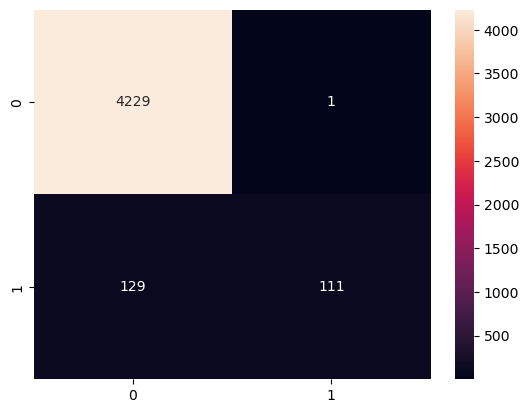

<Figure size 640x480 with 0 Axes>

In [39]:
c_m_rf = confusion_matrix(y_test, predictions)
sns.heatmap(c_m_rf, annot=True, fmt='d') # font size
plt.show()
plt.savefig('cm_rf.pdf')

In [40]:
# AUC Score
from sklearn import metrics
metrics.roc_auc_score(y_test, predictions)

0.7311317966903073

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

In [42]:
classifier.fit(X_train, y_train)

c:\Users\alahn\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=1)

In [43]:
# Scores of test and training data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9676360924683073
Testing Data Score: 0.9387024608501119


In [44]:
# Predictions vs actual results
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [45]:
from sklearn.metrics import accuracy_score
# Accuracy score for the test dataset
accuracy_score(y_test, predictions)

0.9387024608501119